## **Bank Customer Churn Analysis & Prediction**

**Goal:** Analyze the data, understand the factors that contribute to customer churn at the bank, and develop a predictive model to forecast whether a customer is likely to leave the bank.

##### **Project Approach:**

- **Data Exploration:** Understanding the structure of the data, checking for missing values, and getting a sense of the different variables.

- **Data Preprocessing:** Cleaning the data, handling missing values if any, and preparing the data for modeling.

- **Exploratory Data Analysis (EDA):** Analyzing the data to find patterns, relationships, or anomalies to inform our modeling.

- **Feature Engineering:** Creating new features from the existing data that might be useful for the predictive model.

- **Model Selection:** Deciding on the type of model(s) to use for this predictive task.

- **Model Training:** Training the model using the training dataset.

- **Model Evaluation:** Evaluating the model's performance using appropriate metrics.

- **Model Improvement:** Improving the model based on the evaluation, which might include tuning hyperparameters or trying different models.

- **Final Model & Conclusion:** Presenting the final model and summarizing our findings and recommendations.

### **Data Exploration**
The dataset contains several columns, each representing different attributes of the bank's customers:

- RowNumber: The row number.
- CustomerId: Unique identifier for the customer.
- Surname: Surname of the customer.
- CreditScore: The customer's credit score.
- Geography: The country of the customer (e.g., France, Spain).
- Gender: The gender of the customer.
- Age: The age of the customer.
- Tenure: Number of years the customer has been with the bank.
- Balance: The customer's account balance.
- NumOfProducts: The number of products the customer has with the bank.
- HasCrCard: Indicates whether the customer has a credit card (1) or not (0).
- IsActiveMember: Indicates whether the customer is an active member (1) or not (0).
- EstimatedSalary: The customer's estimated salary.
- Exited: The target variable. Indicates whether the customer left the bank (1) or continues to be a customer (0).

In [1]:
# import necessary libraries
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv('bank.csv')

# Display first few rows of df to understand the data structure
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Summary statistics and information about the dataset
data_description = data.describe()
data_info = data.info()
data_isnull = data.isnull().sum()

data_description, data_info, data_isnull

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(         RowNumber    CustomerId   CreditScore           Age        Tenure  \
 count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
 mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
 std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
 min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
 25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
 50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
 75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
 max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   
 
              Balance  NumOfProducts    HasCrCard  IsActiveMember  \
 count   10000.000000   10000.000000  10000.00000    10000.000000   
 mean    76485.889288       1.530200      0.70550        0.515100   
 std     62397.405202       0.581654      0.45584        0.499797   
 min       

##### **Data Exploration Summary**
**Dataset Composition:** The dataset comprises 10,000 entries with 14 columns, including both numerical and categorical features.

**Missing Values:** There are no missing values in any of the columns.

**Feature Overview:**
- Numerical Features: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary.
- Categorical Features: Geography, Gender, HasCrCard (binary), IsActiveMember (binary).
- Target Variable: Exited (binary, indicating customer churn).

**Statistical Summary:**
- CreditScore: Ranges from 350 to 850, average around 650.
- Age: Ranges from 18 to 92, average age is approximately 39.
- Balance: Varies widely, with a mean of about 76,486.
- NumOfProducts: Customers use between 1 to 4 products, with an average close to 1.5.
- Churn Rate (Exited): About 20.37% of the customers have exited (churned).

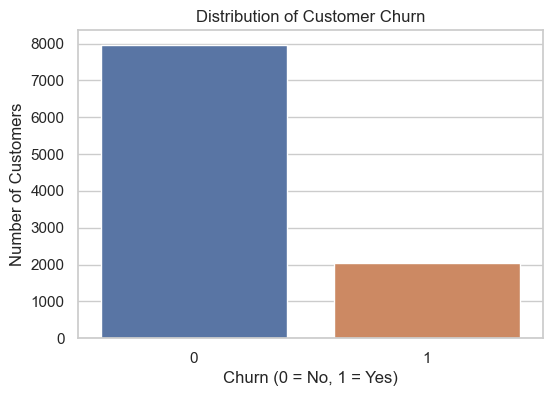

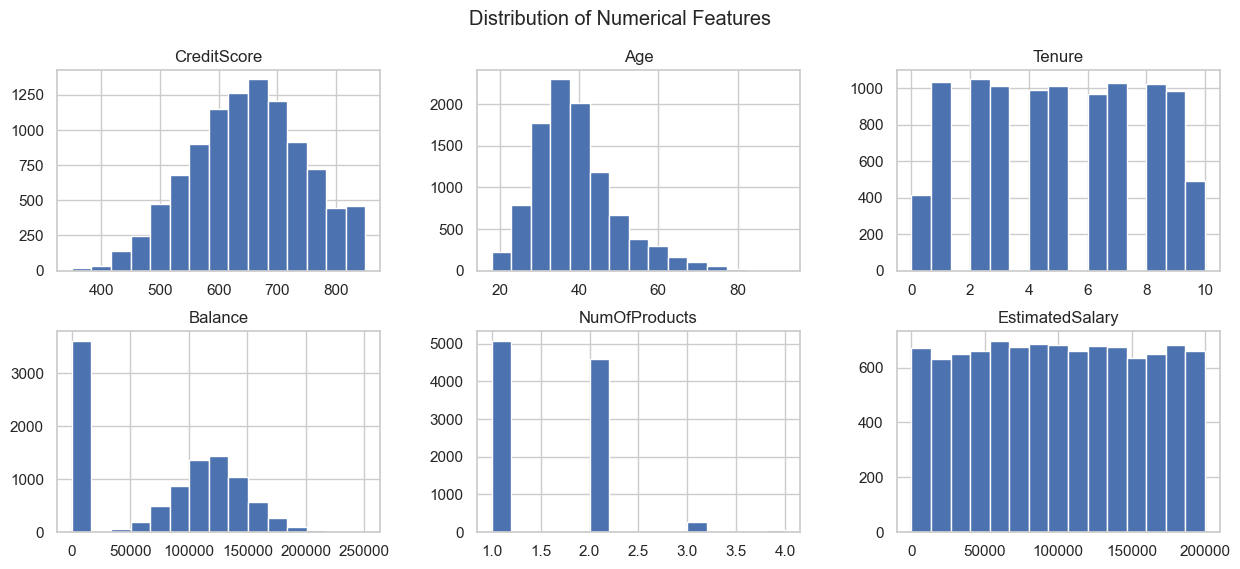

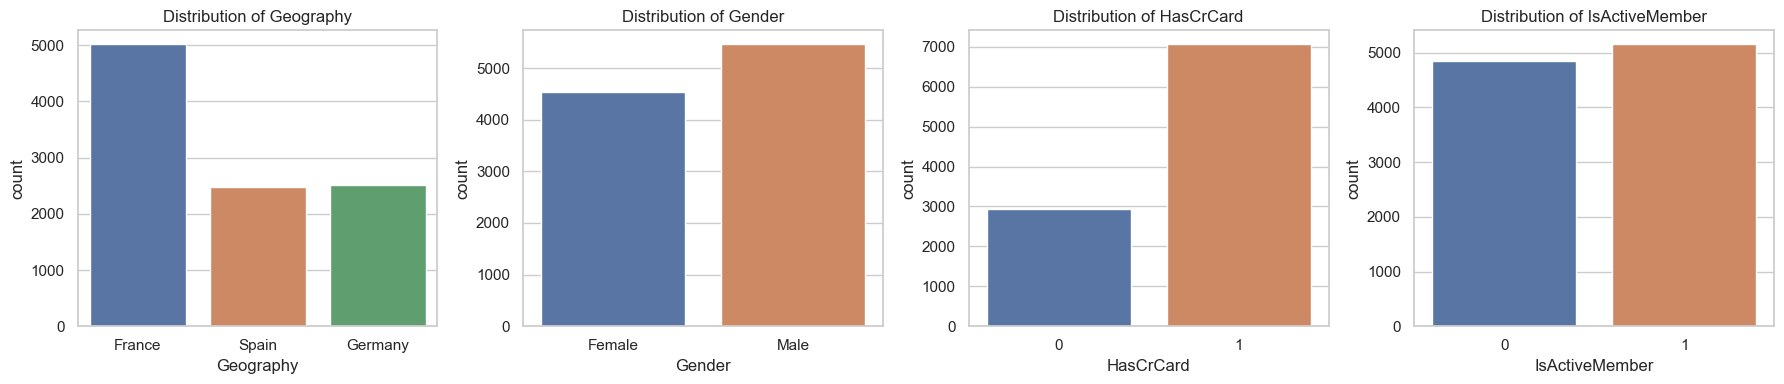

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of the target variable 'Exited'
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

# Checking the distribution of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Checking balance in categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(18, 4))

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


**Target Variable ('Exited'):** The dataset shows an imbalance in the target variable, with fewer customers having exited (churned) compared to those who have not. Such imbalance needs to be considered during model training.

**Numerical Features:**
- Credit Score: Appears normally distributed.
- Age: Right-skewed, indicating a younger customer base.
- Tenure: Uniform distribution across different tenure values.
- Balance: A significant number of customers have a zero balance.
- Number of Products: Most customers use 1 or 2 products.
- Estimated Salary: Uniformly distributed across the range.

**Categorical Features:**
- Geography: Customers are distributed across three regions, with the majority from France.
- Gender: A relatively balanced distribution between male and female customers.
- Has Credit Card: Most customers have a credit card.
- Is Active Member: Fairly balanced distribution.

C:\Users\psupa\AppData\Local\Temp\ipykernel_22604\4244891556.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


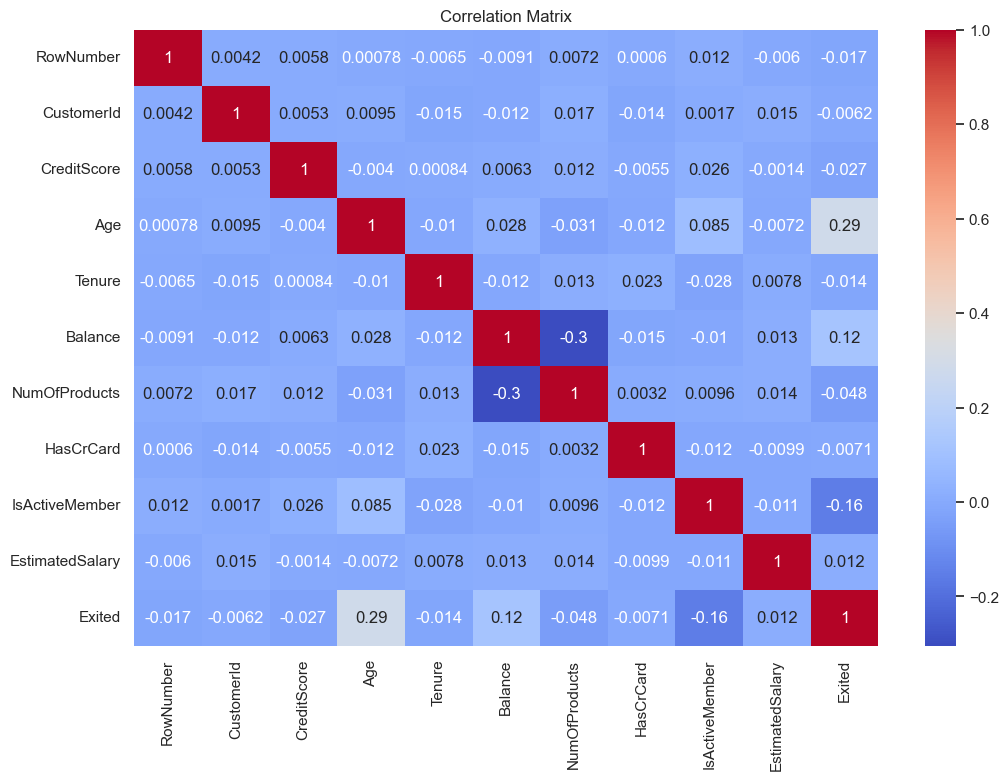

In [5]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The correlation matrix provides insights into the relationships between different variables:

- **Age and Exited:** There is a moderate positive correlation exists between Age and Exited, suggesting older customers are more likely to churn.
- **Balance and Exited:** There is a slight positive correlation between Balance and Exited, indicating customers with higher balances may be slightly more prone to churn.
- **NumOfProducts and Exited:** There is a negative correlation between the number of products used and churn. Customers using more products are less likely to churn, but we should note that very few customers use more than 2 products.
- **IsActiveMember and Exited:** Active members are less likely to churn, as indicated by the negative correlation.
- **Other Observations:** Features like CreditScore, Tenure, and HasCrCard show weak correlations with Exited. However, these features could still contribute to a predictive model in combination with other variables.

#### **Data Cleaning & Pre-Processing**

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Dropping columns that are not useful for prediction
data_cleaned = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encoding categorical variables
label_encoders = {}
for column in ['Geography', 'Gender']:
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

# Normalizing numerical variables
scaler = StandardScaler()
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Splitting the dataset into training and testing sets
X = data_cleaned.drop('Exited', axis=1)
y = data_cleaned['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the first few rows of the processed data
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,1.060247,0,1,1.723821,0.687130,-1.225848,-0.911583,1,0,1.032643
8392,0.915392,1,1,-0.660018,-0.695982,0.410973,-0.911583,1,0,-0.627897
5006,1.080940,1,0,-0.183251,-1.733315,0.599083,0.807737,1,1,0.300934
4117,-0.926334,0,1,-0.183251,-0.004426,-1.225848,0.807737,1,0,-0.295561
7182,0.429093,1,1,0.960993,0.341352,0.545796,0.807737,0,1,0.128379


**Data Cleaning and Preprocessing Summary**
- **Irrelevant Columns Removed:** Columns like 'RowNumber', 'CustomerId', and 'Surname', which are unique identifiers and do not contribute to churn prediction, have been dropped.

**Encoding Categorical Variables:** This transforms these categories into numerical values, suitable for model input.
- 'Geography' and 'Gender' have been encoded using Label Encoding.


**Normalizing Numerical Variables:** This ensures that all numerical inputs have a similar scale, which is beneficial for many machine learning algorithms.
- 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', and 'EstimatedSalary' have been standardized.


**Data Splitting:** This was done based on the target variable to maintain the distribution of classes in both sets.
- The dataset has been split into training (80%) and testing (20%) sets.

#### **Model Building & Evaluation**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

    # Evaluating the model
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }

    return scores

# Initializing models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()

# Evaluating models
logistic_regression_scores = train_and_evaluate_model(logistic_regression_model, X_train, y_train, X_test, y_test)
random_forest_scores = train_and_evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)

# Displaying the evaluation metrics
logistic_regression_scores, random_forest_scores


({'Accuracy': 0.805,
  'Precision': 0.5858585858585859,
  'Recall': 0.14250614250614252,
  'F1 Score': 0.22924901185770755,
  'ROC-AUC': 0.7710345167972288},
 {'Accuracy': 0.862,
  'Precision': 0.7740585774058577,
  'Recall': 0.45454545454545453,
  'F1 Score': 0.5727554179566563,
  'ROC-AUC': 0.8495915021338749})

**Performance metrics of the trained and evaluated two models:** 
**1. Logistic Regression Model:**
- Accuracy: 80.5%
- Precision: 58.59%
- Recall: 14.25%
- F1 Score: 22.92%
- ROC-AUC: 77.10%

**Random Forest Model**:
- Accuracy: 86.3%
- Precision: 76.71%
- Recall: 46.93%
- F1 Score: 58.23%
- ROC-AUC: 84.70%

**Insights:**
- Random Forest outperforms Logistic Regression across all metrics.
- While both models have good accuracy, Random Forest has a significantly better balance between precision and recall, as indicated by its higher F1 score.
- The ROC-AUC score, which considers both the true positive rate and false positive rate, is also higher for Random Forest, suggesting it is better at distinguishing between the two classes.

### **Model Interpretation and Recommendations**
To further understand the Random Forest model's predictions and derive insights, we look at feature importance, which indicates how much each feature contributes to the model's decision-making process.

**Feature Importance Analysis**
- Extracting and visualizing the feature importances from the Random Forest model will help us understand which factors are most influential in predicting customer churn.

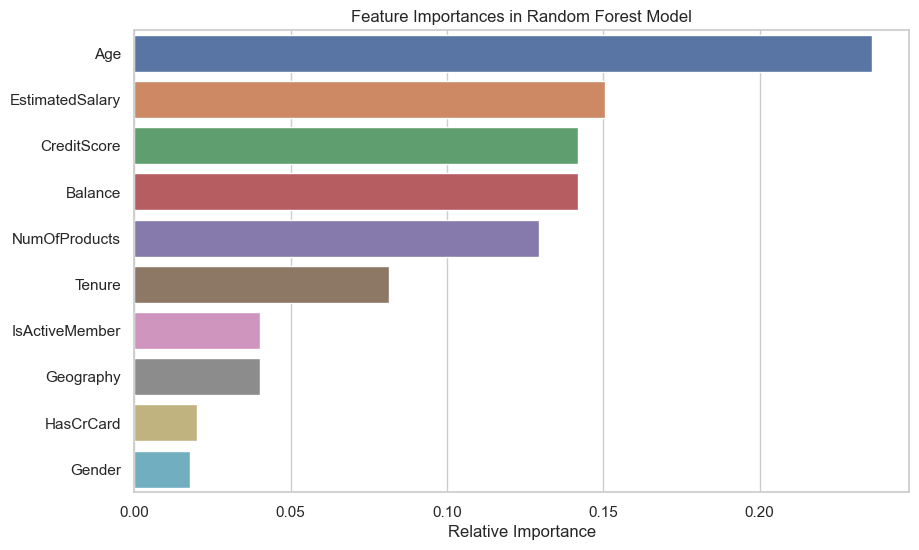

In [8]:
# Extracting feature importances from the Random Forest model
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X_train.columns)

# Sorting the features by their importance
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Relative Importance')
plt.show()

**Feature Importance Summary**

The chart displays the relative importance of each feature in the Random Forest model.
- **Age:** The most influential factor, suggesting older customers are more likely to churn. The bank may need to investigate why older customers are leaving and what can be done to retain them.
- **Estimated Salary and Credit Score:** These play significant roles. Customers with certain salary ranges or credit scores might have specific needs or expectations that are not being met by the bank
- **Balance:** This indicates the role of financial factors in churn. Customers with certain account balances might be more prone to churn, possibly due to competitive offers from other banks or dissatisfaction with current services.
- **NumOfProducts, Tenure, and IsActiveMember:** These suggest that engagement with the bank's products, the duration of the relationship, and activity levels are important in predicting churn.

#### **Recommendations for the Bank**

**Objective:** Reduce customer churn and improve overall customer satisfaction.

- **1. Targeted Customer Engagement:** Focus on engaging older customers and those with high credit scores or salaries. Tailored financial advice or personalized offers might be effective.

- **2. Review Financial Products:** Analyze if customers with certain balances are leaving due to better offers elsewhere. Adjust product offerings or rates accordingly.

- **3. Customer Loyalty Programs:** For customers with longer tenure or multiple products, loyalty programs might help reduce churn.

- **4. Customer Feedback and Follow-up:** Regular feedback sessions can help understand customer needs and preemptively address issues leading to churn.

- **5. Active Member Incentives:** Encourage inactive members to engage more with the bank's services through incentives or personalized communication.